### 데이터 로드

In [30]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = fdr.DataReader('ETH/KRW', '2017-11-11', '2022-12-27') # 2017-11-11 to 2022-12-26, 빗썸기준
df.tail() # 시가, 고가, 저가, 종가, 조정 종가, 거래량

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-22,1554872.500,1574077.750,1528918.625,1574084.625,1574084.625,6845174158754
2022-12-23,1573951.750,1571930.125,1562333.625,1562102.250,1562102.250,6191046699863
2022-12-24,1562049.125,1568186.250,1557210.875,1563368.625,1563368.625,3362118092937
2022-12-25,1563398.000,1566401.750,1541055.250,1560886.625,1560886.625,5048671734817
2022-12-26,1560833.125,1564950.500,1548577.375,1564950.500,1564950.500,4186168814331


In [38]:
df.info() # 1872개가 있음

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1872 entries, 2017-11-11 to 2022-12-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1872 non-null   float64
 1   High       1872 non-null   float64
 2   Low        1872 non-null   float64
 3   Close      1872 non-null   float64
 4   Adj Close  1872 non-null   float64
 5   Volume     1872 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 102.4 KB


<AxesSubplot: xlabel='Date'>

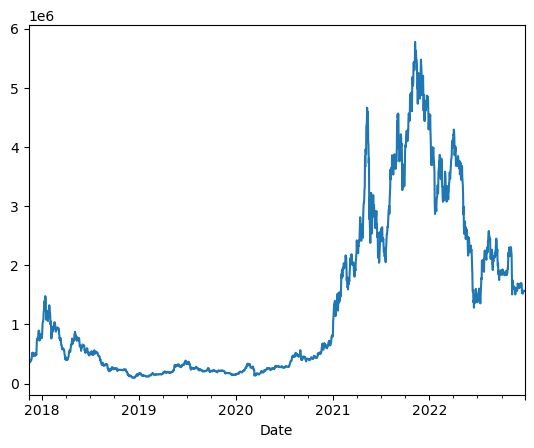

In [40]:
df['Close'].plot()

### 데이터 전처리

In [41]:
# 가격을 0~1사이로 변환. 시간 소요 절감 가능.
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominater = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominater + 1e-7) # 0으로 나누기 에러 방지 위해 1e-7 더함

In [51]:
# Open	High	Low	Close	Adj Close	Volume
df_x = df[['Open', 'High', 'Low', 'Volume']]
df_x = MinMaxScaler(df_x)
df_y = df[['Close']] # 타겟 데이터. 종가 예측.
df_y = MinMaxScaler(df_y)

In [68]:
print(df_x.head())
print(df_y.head())

                Open      High       Low    Volume
Date                                              
2017-11-11  0.042057  0.045877  0.043986  0.002777
2017-11-12  0.045231  0.045818  0.044052  0.011853
2017-11-13  0.043640  0.047700  0.045802  0.005128
2017-11-14  0.045617  0.049798  0.047791  0.005415
2017-11-15  0.049578  0.049619  0.049529  0.001260
               Close
Date                
2017-11-11  0.045205
2017-11-12  0.043790
2017-11-13  0.045583
2017-11-14  0.049486
2017-11-15  0.048073


In [56]:
df_x.describe()

,Open,High,Low,Volume
count,1872.000000,1872.000000,1872.000000,1872.000000
mean,0.219570,0.226411,0.219732,0.154130
std,0.249706,0.256617,0.250594,0.131642
min,0.000000,0.000000,0.000000,0.000000
25%,0.027196,0.028159,0.027071,0.046445
50%,0.079936,0.083142,0.080356,0.128748
75%,0.365787,0.378300,0.368851,0.226086
max,1.000000,1.000000,1.000000,1.000000


In [63]:
# 넘파이 배열로 변경
X = np.array(df_x)
y = np.array(df_y)
print(X.shape, y.shape)

(1872, 4) (1872, 1)


### 10일 동안의 OHLVC 데이터로 다음날 종가 예측
- O(open), H(high), L(low), V(Volume), C(close)

In [65]:
window_size = 10

data_X, data_y = [], []

for i in range(len(y) - window_size):
    _X = X[i: i + window_size] # 다음 날 종가(i+window_size)는 포함 X
    _y = y[i + window_size] # 다음날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, '->', _y)

[[0.27705043 0.27703963 0.2612838  0.12118871]
 [0.25254652 0.25671642 0.26205791 0.0629259 ]
 [0.25717268 0.25790635 0.26463936 0.0390831 ]
 [0.25639512 0.25541217 0.25908786 0.06064984]
 [0.25080184 0.25921288 0.26024116 0.08328916]
 [0.25839712 0.2580247  0.26651599 0.04977171]
 [0.25690363 0.25961163 0.26247497 0.06497208]
 [0.2602622  0.25923425 0.26858451 0.05807879]
 [0.25816695 0.25857638 0.26764788 0.02826714]
 [0.2584044  0.2582628  0.26469401 0.04604028]] -> [0.25856327]


In [97]:
# 10일간의 OHLVC 데이터
print(data_X[0])
print(data_y[0])

[[0.04205678 0.04587698 0.04398627 0.00277695]
 [0.04523142 0.04581794 0.044052   0.01185257]
 [0.04363986 0.0477     0.04580217 0.00512787]
 [0.04561721 0.04979792 0.04779052 0.00541457]
 [0.04957796 0.04961933 0.04952856 0.00125962]
 [0.04811531 0.0476753  0.0477699  0.00204975]
 [0.04692941 0.04739893 0.04862181 0.        ]
 [0.04708829 0.05018149 0.04843482 0.00032152]
 [0.05005622 0.05434566 0.05184373 0.00644027]
 [0.05129698 0.05466775 0.05363472 0.00215758]]
[0.05239914]


### data split

In [80]:
# train_size = int(len(data_y)*0.7)
# X_train = np.array(data_X[0:train_size])
# y_train = np.array(data_y[0:train_size])

# test_size = len(data_y) - train_size
# X_test = np.array(data_X[train_size: len(data_X)])
# y_test = np.array(data_y[train_size: len(data_y)])

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

(1303, 10, 4) (1303, 1)
(559, 10, 4) (559, 1)


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3) # 시계열 데이터 이기 대문에 shuffle=False
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1310, 4) (1310, 1)
(562, 4) (562, 1)


In [96]:
X_train

array([[0.04205678, 0.04587698, 0.04398627, 0.00277695],
       [0.04523142, 0.04581794, 0.044052  , 0.01185257],
       [0.04363986, 0.0477    , 0.04580217, 0.00512787],
       ...,
       [0.49680789, 0.49677738, 0.47835794, 0.32993791],
       [0.46747488, 0.47066046, 0.45795624, 0.28502561],
       [0.44601999, 0.46316198, 0.44548039, 0.29551885]])